# This notebook explores photon and pion shower properties
### Looking at both longitudinal and transverse shower shapes
### ... and how to exactly compute these quantities with the information we get out of the detector


In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:98% !important; }</style>"))

In [2]:
import numpy as np
from tqdm import tqdm as tqdm
import matplotlib.pyplot as plt
import os

## Load input data arrays

In [3]:
## format 0:evno, 1:x, 2:y, 3:z, 4:l, 5:t, 6:e

phoar = np.load("phoarray.npy")
pi80ar = np.load("piarrayp80.npy")
pi90ar = np.load("piarrayp90.npy")
pi95ar = np.load("piarrayp95.npy")
piALLar = np.load("piarraypALL.npy")

## Plot events

  0%|          | 4/1000 [00:00<00:15, 64.74it/s]


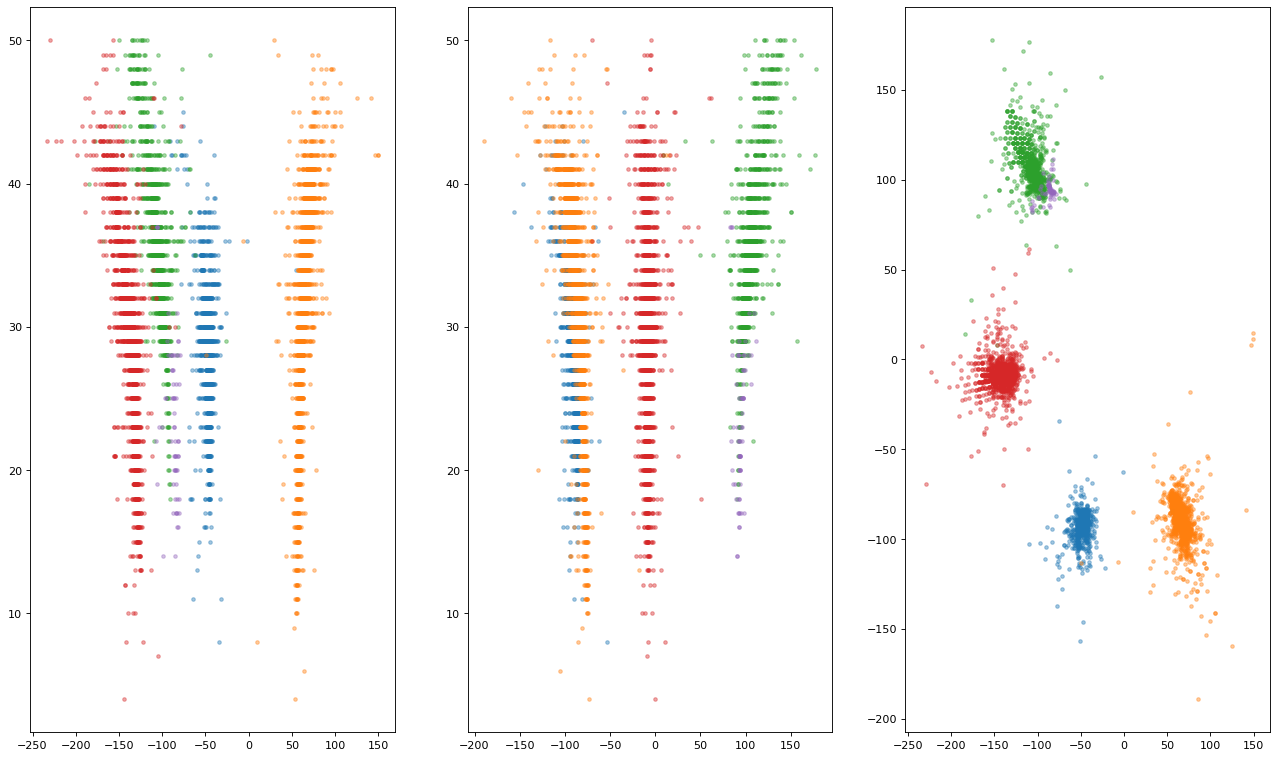

In [4]:
nc = 0
fig, (ax0,ax1,ax2) = plt.subplots(1, 3, figsize=(20,12),dpi=80)
inputarray  = piALLar
for evts in tqdm(np.unique(inputarray[:,0])):  ## loop over events 
        evar = inputarray[inputarray[:,0] == evts]  ## select rows corresponding to event
        evar = evar[evar[:,6] > 0.050]    ## threshold on energy
        
        
        ax0.scatter(evar[:,1],evar[:,4],s=10,alpha=0.4)#evar[:,6]
        ax1.scatter(evar[:,2],evar[:,4],s=10,alpha=0.4)
        ax2.scatter(evar[:,1],evar[:,2],s=10,alpha=0.4)
        nc += 1
        if nc > 4 :
            break
#plt.show()


## Calculate shower longitudinal properties 

In [5]:
## input array and number of layers to consider for plots etc

## format 0:evno, 1:x, 2:y, 3:z, 4:l, 5:t, 6:e
def dictprop(inputarray,nlay):
    minlay = []
    maxlay = []
    enVSlay_dict = {i:[] for i in range(nlay)}
    
    for evts in tqdm(np.unique(inputarray[:,0])): ## loop over events
        evar = inputarray[inputarray[:,0] == evts]  ## select rows corresponding to event
        evar = evar[evar[:,6]>0.05]  ## threshold on energy
        tote = np.sum(evar[:,6])  ## total energy for the particle
        for i in range(nlay):
            enlay = np.sum(evar[evar[:,4] == i][:,6]) ## sum energy for this layer
            enVSlay_dict[i].append( enlay/tote)
        
        minlay.append(np.min(evar[:,4]))  ## save shower start layer  
        maxlay.append(np.max(evar[:,4]))   ## save shower end layer
        
    return enVSlay_dict, minlay, maxlay

In [6]:
def plotprop(inputdict):
    xx = []
    yy = []
    yer = []
    for k,v in inputdict.items():
        if len(v)==0:
            continue
        xx.append(k)
        yy.append(np.mean(v))
    return xx,yy

In [7]:
phoprop = dictprop(phoar,50)
plotpho = plotprop(phoprop[0])
pi80prop = dictprop(pi80ar,50)
plotpi80 = plotprop(pi80prop[0])
pi90prop = dictprop(pi90ar,50)
plotpi90 = plotprop(pi90prop[0])
pi95prop = dictprop(pi95ar,50)
plotpi95 = plotprop(pi95prop[0])
piALLprop = dictprop(piALLar,50)
plotpiALL = plotprop(piALLprop[0])

100%|██████████| 1000/1000 [00:06<00:00, 157.15it/s]


## Plot longitudinal shower profile 

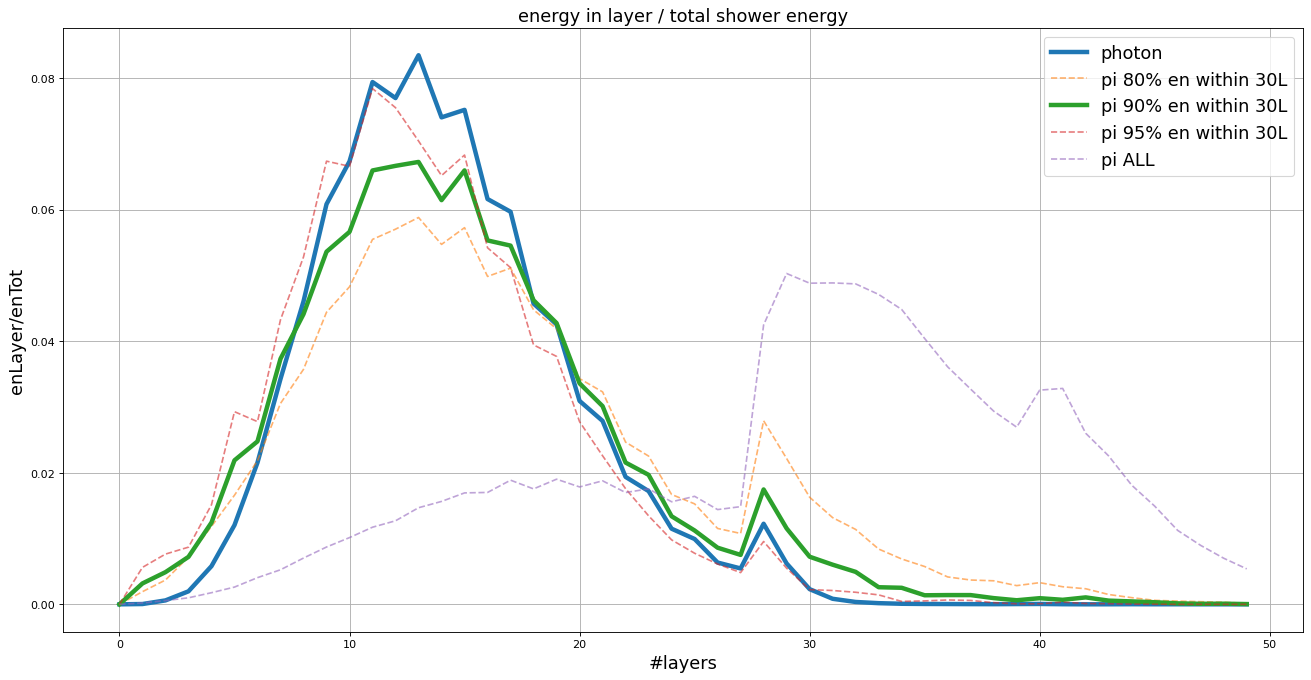

In [8]:
from matplotlib.pyplot import figure
figure(figsize=(20, 10), dpi=80)
plt.rcParams['axes.labelsize'] = 16
plt.rcParams['axes.titlesize'] = 16 


plt.plot(plotpho[0],plotpho[1],label="photon",linewidth=4)
plt.plot(plotpi80[0],plotpi80[1],label="pi 80% en within 30L",linestyle="--",alpha=0.6)
plt.plot(plotpi90[0],plotpi90[1],label="pi 90% en within 30L",linewidth=4)
plt.plot(plotpi95[0],plotpi95[1],label="pi 95% en within 30L",linestyle="--",alpha=0.6)
plt.plot(plotpiALL[0],plotpiALL[1],label="pi ALL",linestyle="--",alpha=0.6)

plt.xlabel("#layers")
plt.ylabel("enLayer/enTot")
plt.legend(prop={'size': 16})
plt.title("energy in layer / total shower energy" )
plt.grid()
plt.show()

## Plot shower start layer

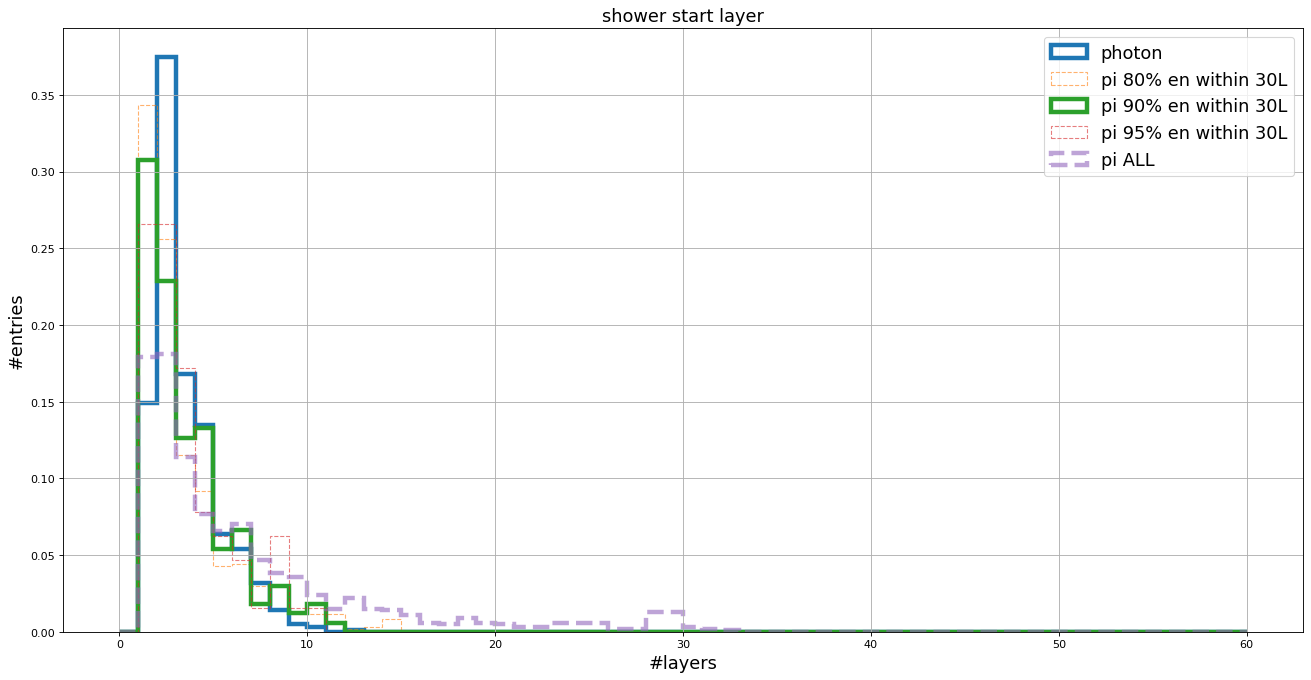

In [9]:
from matplotlib.pyplot import figure
figure(figsize=(20, 10), dpi=80)
plt.rcParams['axes.labelsize'] = 16
plt.rcParams['axes.titlesize'] = 16 


plt.hist(phoprop[1],range=[0,60],bins=60,label="photon",linewidth=4,histtype='step',density=True)
plt.hist(pi80prop[1],range=[0,60],bins=60,label="pi 80% en within 30L",linestyle="--",alpha=0.6,histtype='step',density=True)
plt.hist(pi90prop[1],range=[0,60],bins=60,label="pi 90% en within 30L",linewidth=4,histtype='step',density=True)
plt.hist(pi95prop[1],range=[0,60],bins=60,label="pi 95% en within 30L",linestyle="--",alpha=0.6,histtype='step',density=True)
plt.hist(piALLprop[1],range=[0,60],bins=60,label="pi ALL",linestyle="--",alpha=0.6,histtype='step',linewidth=4,density=True)

plt.xlabel("#layers")
plt.ylabel("#entries")
plt.legend(prop={'size': 16})
#plt.yscale("log")
plt.title("shower start layer" )
plt.grid()
plt.show()

print()

## Plot shower end layer

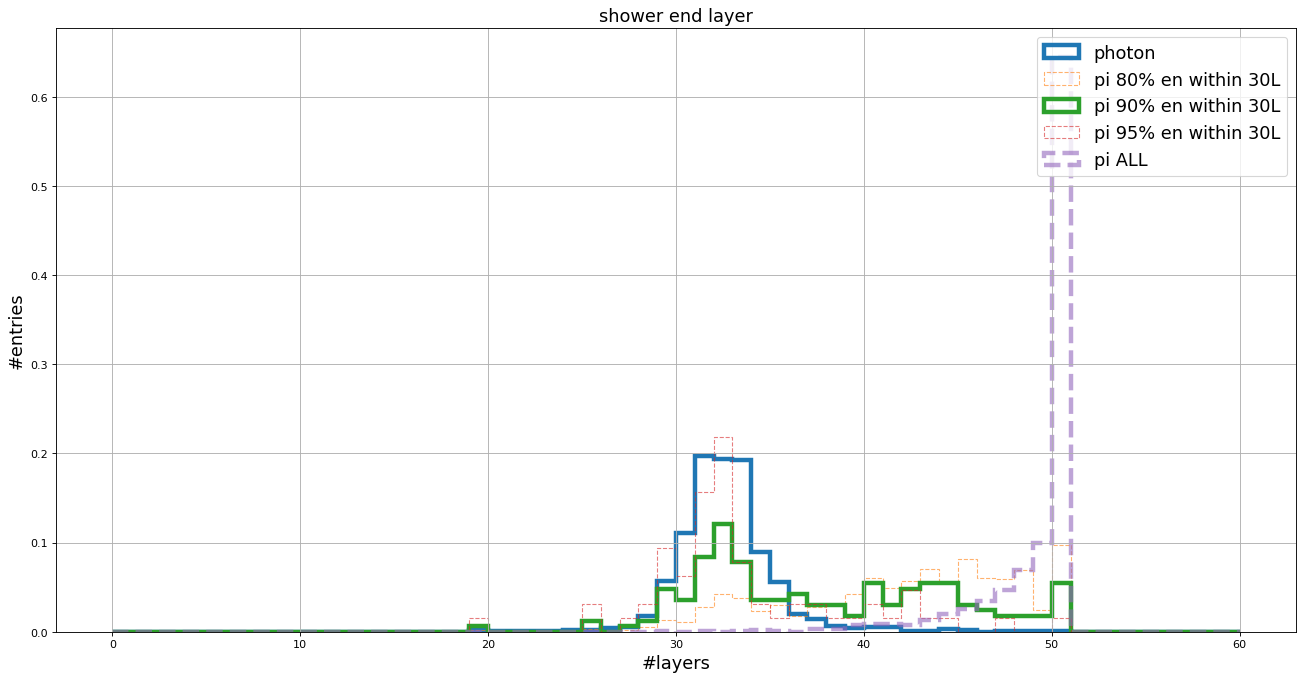

In [10]:
from matplotlib.pyplot import figure
figure(figsize=(20, 10), dpi=80)
plt.rcParams['axes.labelsize'] = 16
plt.rcParams['axes.titlesize'] = 16 


plt.hist(phoprop[2],range=[0,60],bins=60,label="photon",linewidth=4,histtype='step',density=True)
plt.hist(pi80prop[2],range=[0,60],bins=60,label="pi 80% en within 30L",linestyle="--",alpha=0.6,histtype='step',density=True)
plt.hist(pi90prop[2],range=[0,60],bins=60,label="pi 90% en within 30L",linewidth=4,histtype='step',density=True)
plt.hist(pi95prop[2],range=[0,60],bins=60,label="pi 95% en within 30L",linestyle="--",alpha=0.6,histtype='step',density=True)
plt.hist(piALLprop[2],range=[0,60],bins=60,label="pi ALL",linestyle="--",alpha=0.6,histtype='step',linewidth=4,density=True)

plt.xlabel("#layers")
plt.ylabel("#entries")
plt.legend(prop={'size': 16})
#plt.yscale("log")
plt.title("shower end layer" )
plt.grid()
plt.show()

print()

## Calculate shower transverse properties

In [11]:
def dictprop_trans(inputarray,nlay):
    enVSlay_dict = {i:[] for i in range(nlay)}
    enVSlayw_dict = {i:[] for i in range(nlay)}
    
    for evts in tqdm(np.unique(inputarray[:,0])):
        evar = inputarray[inputarray[:,0] == evts]
        evar = evar[evar[:,6]>0.05]
        totE = np.sum(evar[:,6])
        for i in range(nlay): ## loop over layers
            evarl = evar[evar[:,4] == i]
            if np.sum(evarl[:,6]) == 0: ## skip 0 energy layers
                continue

            meanx = np.mean(evarl[:,1]) 
            meany = np.mean(evarl[:,2]) 
            
            maxex = evarl[evarl[:,6] == np.max(evarl[:,6])][:,1]   ## max x in layer
            maxey = evarl[evarl[:,6] == np.max(evarl[:,6])][:,2]   ## max y in layer
            enl = np.sum(evarl[:,6]) ## energy in layer
            
            if enl == 0 :
                continue
            rad90 = 0.0 
            for j in np.linspace(0.,10.,100): ## increase radius size in steps
                evarsel =  evarl[np.sqrt((evarl[:,1] - maxex[0])**2+(evarl[:,2] - maxey[0])**2) < j] ## only hits within radius

                if np.sum(evarsel[:,6])/enl > 0.9: ## radius for which fraction of energy inside radius/ total energy in layer > 0.9
                    rad90 = j
                    break
            
            
            enVSlay_dict[i].append(rad90)
            enVSlayw_dict[i].append(np.sum(evarl[:,6])/totE)

    return enVSlay_dict , enVSlayw_dict

In [12]:
phoprop_trans = dictprop_trans(phoar,30)
plotphotrans = plotprop(phoprop_trans[0])

pi80prop_trans = dictprop_trans(pi80ar,30)
plotpi80trans = plotprop(pi80prop_trans[0])
pi90prop_trans = dictprop_trans(pi90ar,30)
plotpi90trans = plotprop(pi90prop_trans[0])
pi95prop_trans = dictprop_trans(pi95ar,30)
plotpi95trans = plotprop(pi95prop_trans[0])
piALLprop_trans = dictprop_trans(piALLar,30)
plotpiALLtrans = plotprop(piALLprop_trans[0])

100%|██████████| 1000/1000 [00:21<00:00, 47.61it/s]


## Plot lateral shower profile

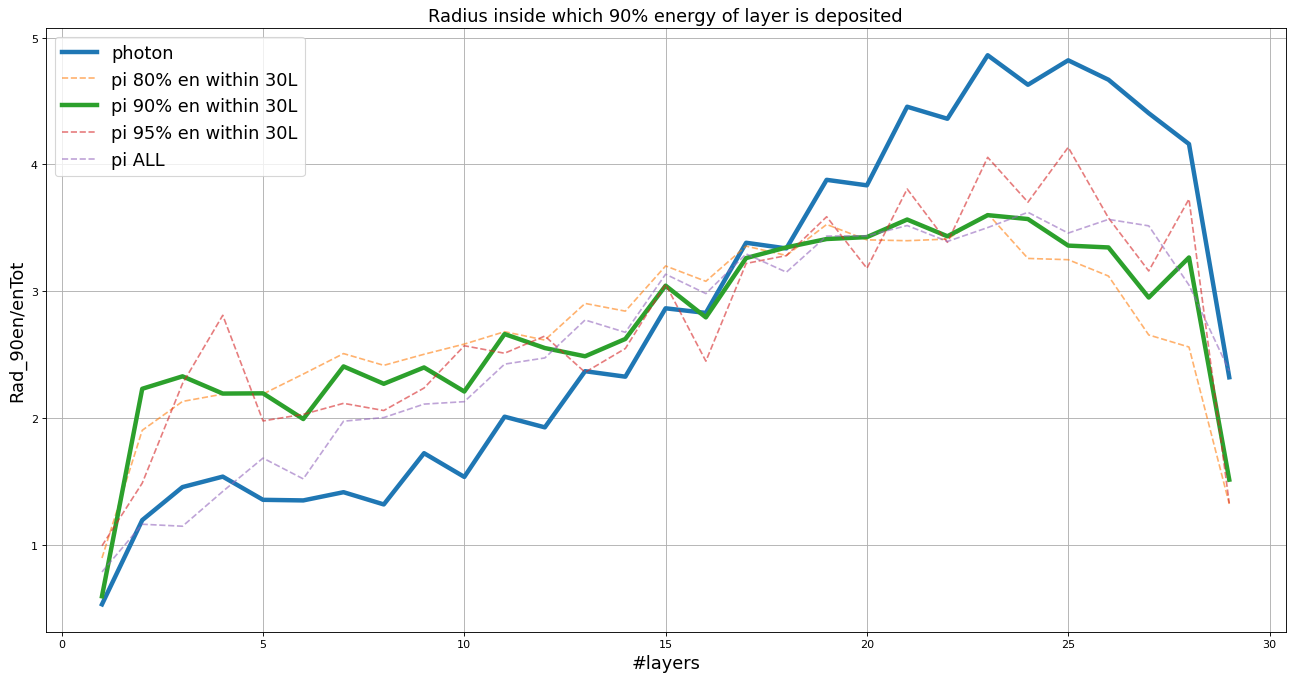

In [13]:
from matplotlib.pyplot import figure
figure(figsize=(20, 10), dpi=80)
plt.rcParams['axes.labelsize'] = 16
plt.rcParams['axes.titlesize'] = 16


plt.plot(plotphotrans[0],plotphotrans[1],label="photon",linewidth=4,)
plt.plot(plotpi80trans[0],plotpi80trans[1],label="pi 80% en within 30L",linestyle="--",alpha=0.6)
plt.plot(plotpi90trans[0],plotpi90trans[1],label="pi 90% en within 30L",linestyle="-",linewidth=4,)
plt.plot(plotpi95trans[0],plotpi95trans[1],label="pi 95% en within 30L",linestyle="--",alpha=0.6)
plt.plot(plotpiALLtrans[0],plotpiALLtrans[1],label="pi ALL",linestyle="--",alpha=0.6)

plt.xlabel("#layers")
plt.ylabel("Rad_90en/enTot")
plt.legend(loc="upper left",prop={'size': 16})
plt.title("Radius inside which 90% energy of layer is deposited" )
plt.grid()
plt.show()

## Calculate weighted 90% radius

In [14]:
## average 90% radius with weights = energy in layer/total energy of shower
prop_trans = phoprop_trans
wrad = []
for i in prop_trans[1].keys():
    if len(phoprop_trans[0][i]) > 0:
        
        wrad.append(np.average(prop_trans[0][i],weights =prop_trans[1][i] ))
        
print(np.mean(wrad))

2.8062270616192615
